In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, GRU, Flatten
from sklearn.preprocessing import StandardScaler

In [2]:
# Завантажимо файл і подивимось на вміст
path = r'C:\PythonProject\internet_service_churn.csv'
data = pd.read_csv(path)
data.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [3]:
# Згідно рекомендацій попередьної частини зробим потрібні перетворення по  очищенню данних датасета
data = data.fillna({'reamining_contract':data['reamining_contract'].min()}).dropna()
data = data.iloc[:, 1:]
data.isnull().sum(), data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 71893 entries, 0 to 72273
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             71893 non-null  int64  
 1   is_movie_package_subscriber  71893 non-null  int64  
 2   subscription_age             71893 non-null  float64
 3   bill_avg                     71893 non-null  int64  
 4   reamining_contract           71893 non-null  float64
 5   service_failure_count        71893 non-null  int64  
 6   download_avg                 71893 non-null  float64
 7   upload_avg                   71893 non-null  float64
 8   download_over_limit          71893 non-null  int64  
 9   churn                        71893 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 6.0 MB


(is_tv_subscriber               0
 is_movie_package_subscriber    0
 subscription_age               0
 bill_avg                       0
 reamining_contract             0
 service_failure_count          0
 download_avg                   0
 upload_avg                     0
 download_over_limit            0
 churn                          0
 dtype: int64,
 None)

In [5]:
# Розділимо датасет, відберемо ознаки і таргет-колонку
X = data.iloc[:, :-1]
y = data.churn

# зробимо тренувальну і тестову вибірки даних, подивмось на їх розмірності для контролю.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((57514, 9), (14379, 9), (57514,), (14379,))

In [7]:
# Зробимо масштабування даних
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [11]:
# One-hot кодування таргету, можливо можно то і не робить використавши 1 нейрон для бинарної класифікації, але зробим загальний випадок
y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)

In [12]:
X_train.shape, y_train.shape

((57514, 9), (57514, 2))

In [28]:
# Перевіримо як впливає кількість шарів і кількість нейронів на результат, створимо кілька одношарови мереж з 32, 64, 128 нейронів
# Функцію активації для прикладу оберем 'tanh'б для функції активацчї вихідного шару оберем 'sigmoid', бо 'relu' вирогідно буде нам давать 1 переважно
#оберемо оптимізатор 'adam' для прикладу, оскільки в нас бінарна класифікація то loss буде відповідний, контрольвоана метрика нехай 'точність'
model_NN_1_32 = keras.Sequential([
    keras.layers.Flatten(input_shape=(9,)),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(2, activation='sigmoid')
])
model_NN_1_64 = keras.Sequential([
    keras.layers.Flatten(input_shape=(9,)),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(2, activation='sigmoid')
])
model_NN_1_128 = keras.Sequential([
    keras.layers.Flatten(input_shape=(9,)),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(2, activation='sigmoid')
])
model_NN_1_32.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model_NN_1_64.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model_NN_1_128.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [29]:
# навчання моделей 
history_NN_1_32 = model_NN_1_32.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8145 - loss: 0.4219 - val_accuracy: 0.8754 - val_loss: 0.3251
Epoch 2/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8784 - loss: 0.3211 - val_accuracy: 0.8867 - val_loss: 0.3065
Epoch 3/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8869 - loss: 0.3038 - val_accuracy: 0.8933 - val_loss: 0.2910
Epoch 4/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8960 - loss: 0.2884 - val_accuracy: 0.8999 - val_loss: 0.2813
Epoch 5/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9015 - loss: 0.2781 - val_accuracy: 0.9025 - val_loss: 0.2735
Epoch 6/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9056 - loss: 0.2678 - val_accuracy: 0.9060 - val_loss: 0.2688
Epoch 7/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9087 - loss: 0.2619 - val_accuracy: 0.9068 - val_loss: 0.2643
Epoch 8/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9108 - loss: 0.2583 - 

In [30]:
history_NN_1_64 = model_NN_1_64.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8670 - loss: 0.3701 - val_accuracy: 0.8740 - val_loss: 0.3326
Epoch 2/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8777 - loss: 0.3199 - val_accuracy: 0.8796 - val_loss: 0.3120
Epoch 3/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8883 - loss: 0.3028 - val_accuracy: 0.8947 - val_loss: 0.2926
Epoch 4/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8976 - loss: 0.2867 - val_accuracy: 0.8971 - val_loss: 0.2796
Epoch 5/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9018 - loss: 0.2749 - val_accuracy: 0.9026 - val_loss: 0.2732
Epoch 6/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9065 - loss: 0.2680 - val_accuracy: 0.9049 - val_loss: 0.2677
Epoch 7/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9080 - loss: 0.2638 - val_accuracy: 0.9079 - val_loss: 0.2638
Epoch 8/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9113 - loss: 0.2563 - 

In [31]:
history_NN_1_128 = model_NN_1_128.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8493 - loss: 0.3780 - val_accuracy: 0.8737 - val_loss: 0.3324
Epoch 2/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8766 - loss: 0.3263 - val_accuracy: 0.8799 - val_loss: 0.3112
Epoch 3/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8883 - loss: 0.3000 - val_accuracy: 0.8892 - val_loss: 0.2941
Epoch 4/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8942 - loss: 0.2877 - val_accuracy: 0.9004 - val_loss: 0.2816
Epoch 5/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9024 - loss: 0.2743 - val_accuracy: 0.9000 - val_loss: 0.2756
Epoch 6/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9064 - loss: 0.2672 - val_accuracy: 0.9036 - val_loss: 0.2691
Epoch 7/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9054 - loss: 0.2674 - val_accuracy: 0.9063 - val_loss: 0.2692
Epoch 8/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9107 - loss: 0.2556 - 

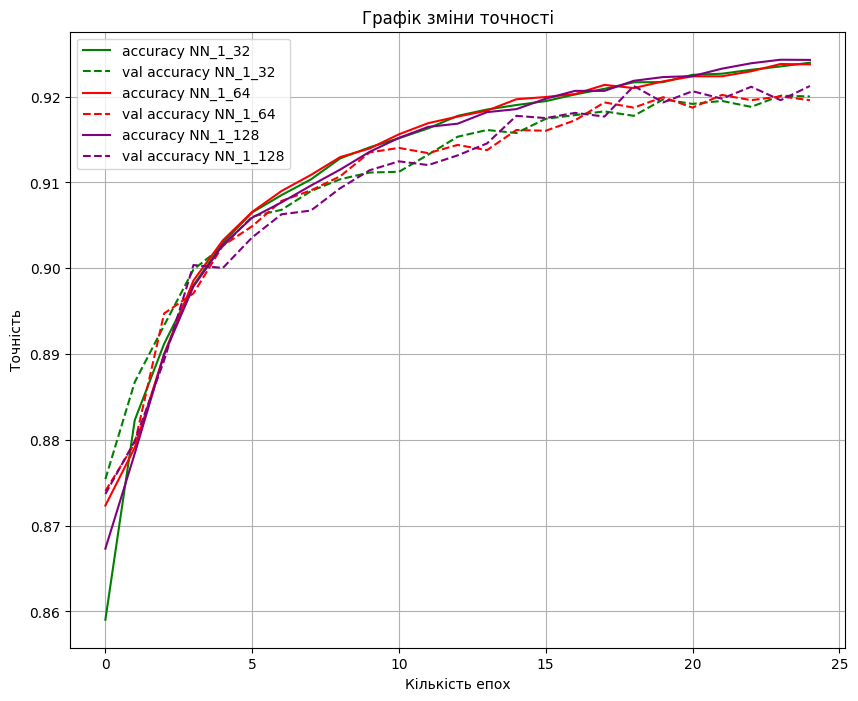

In [34]:
# Графіки зміни точності і функції втрат
plt.figure(figsize=(10, 8))
plt.plot(history_NN_1_32.history['accuracy'], color='green', label='accuracy NN_1_32')
plt.plot(history_NN_1_32.history['val_accuracy'], color='green', ls='--', label='val accuracy NN_1_32')
plt.plot(history_NN_1_64.history['accuracy'], color='red', label='accuracy NN_1_64')
plt.plot(history_NN_1_64.history['val_accuracy'], color='red', ls='--', label='val accuracy NN_1_64')
plt.plot(history_NN_1_128.history['accuracy'], color='purple', label='accuracy NN_1_128')
plt.plot(history_NN_1_128.history['val_accuracy'], color='purple', ls='--', label='val accuracy NN_1_128')
plt.title('Графік зміни точності')
plt.ylabel('Точність')
plt.xlabel('Кількість епох')
plt.grid()
plt.legend(loc='upper left')
plt.show()

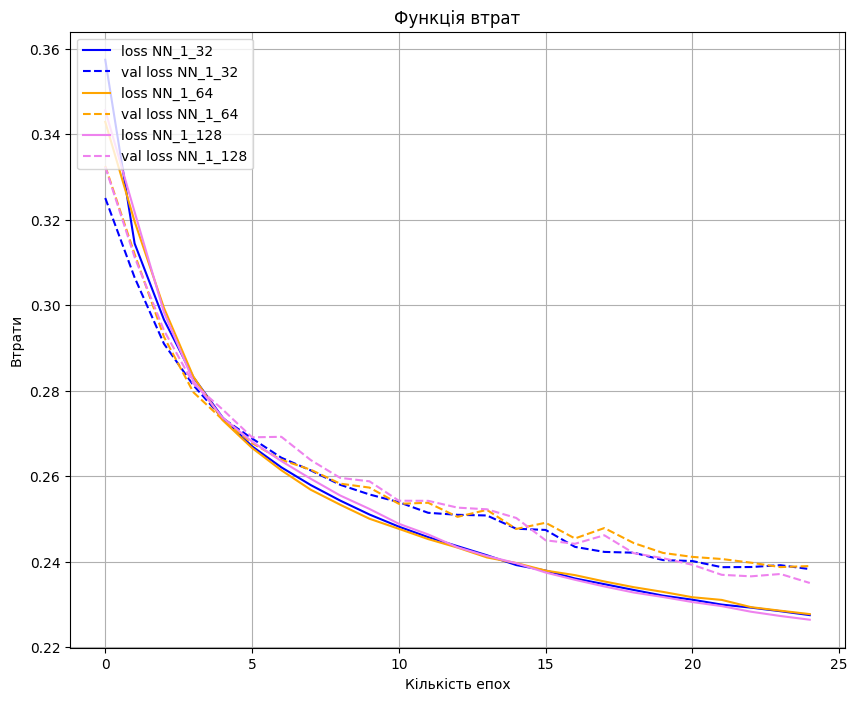

In [35]:
plt.figure(figsize=(10, 8))
plt.plot(history_NN_1_32.history['loss'], color='greem', label='loss NN_1_32')
plt.plot(history_NN_1_32.history['val_loss'], color='green', ls='--', label='val loss NN_1_32')
plt.plot(history_NN_1_64.history['loss'], color='red', label='loss NN_1_64')
plt.plot(history_NN_1_64.history['val_loss'], color='red', ls='--', label='val loss NN_1_64')
plt.plot(history_NN_1_128.history['loss'], color='purple', label='loss NN_1_128')
plt.plot(history_NN_1_128.history['val_loss'], color='purple', ls='--', label='val loss NN_1_128')

plt.title('Функція втрат')
plt.ylabel('Втрати')
plt.xlabel('Кількість епох')
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [43]:
# Попередній експеримент показав що найбіль перспетивною є мережа з 64 нейронів.
# побудуємо тепер двошарові варіанти на її базі, в варінті зменшення кількості на наступний шар і збільшення кількості.
    
model_NN_2_64_128 = keras.Sequential([
    keras.layers.Flatten(input_shape=(9,)),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(2, activation='sigmoid')
])

In [44]:
model_NN_2_64_128.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [45]:
history_NN_2_64_128 = model_NN_64_128.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9341 - loss: 0.2040 - val_accuracy: 0.9289 - val_loss: 0.2149
Epoch 2/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9332 - loss: 0.2022 - val_accuracy: 0.9311 - val_loss: 0.2129
Epoch 3/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9337 - loss: 0.1998 - val_accuracy: 0.9298 - val_loss: 0.2142
Epoch 4/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9345 - loss: 0.2033 - val_accuracy: 0.9315 - val_loss: 0.2132
Epoch 5/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9343 - loss: 0.1998 - val_accuracy: 0.9297 - val_loss: 0.2107
Epoch 6/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9377 - loss: 0.1946 - val_accuracy: 0.9279 - val_loss: 0.2155
Epoch 7/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9339 - loss: 0.1978 - val_accuracy: 0.9307 - val_loss: 0.2112
Epoch 8/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9362 - loss: 0.1950 - 

In [46]:
model_NN_2_64_32 = keras.Sequential([
    keras.layers.Flatten(input_shape=(9,)),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(2, activation='sigmoid')
])

In [47]:
model_NN_2_64_32.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [48]:
history_NN_2_64_32 = model_NN_64_32.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9321 - loss: 0.2120 - val_accuracy: 0.9285 - val_loss: 0.2211
Epoch 2/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9326 - loss: 0.2085 - val_accuracy: 0.9271 - val_loss: 0.2225
Epoch 3/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9326 - loss: 0.2084 - val_accuracy: 0.9252 - val_loss: 0.2290
Epoch 4/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9333 - loss: 0.2087 - val_accuracy: 0.9265 - val_loss: 0.2263
Epoch 5/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9317 - loss: 0.2100 - val_accuracy: 0.9285 - val_loss: 0.2204
Epoch 6/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9328 - loss: 0.2094 - val_accuracy: 0.9283 - val_loss: 0.2219
Epoch 7/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9349 - loss: 0.2053 - val_accuracy: 0.9295 - val_loss: 0.2241
Epoch 8/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9308 - loss: 0.2088 - 

In [60]:
# Зменшення кількості нейронів на наступному шару дає гірші результати, збудуємо для перевірки ще мережу з подвоєною кількістью нейронів 
# в найкращих з експерементально отриманих архітектур
model_NN_2_128_256 = keras.Sequential([
    keras.layers.Flatten(input_shape=(9,)),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(256, activation='tanh'),
    keras.layers.Dense(2, activation='sigmoid')
])

In [61]:
model_NN_2_128_256.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [62]:
history_NN_2_128_256 = model_NN_2_128_256.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8719 - loss: 0.3379 - val_accuracy: 0.9058 - val_loss: 0.2732
Epoch 2/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9101 - loss: 0.2656 - val_accuracy: 0.9123 - val_loss: 0.2542
Epoch 3/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9189 - loss: 0.2452 - val_accuracy: 0.9183 - val_loss: 0.2429
Epoch 4/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9208 - loss: 0.2397 - val_accuracy: 0.9204 - val_loss: 0.2384
Epoch 5/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9227 - loss: 0.2354 - val_accuracy: 0.9236 - val_loss: 0.2356
Epoch 6/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9261 - loss: 0.2272 - val_accuracy: 0.9231 - val_loss: 0.2347
Epoch 7/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9262 - loss: 0.2262 - val_accuracy: 0.9228 - val_loss: 0.2312
Epoch 8/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9258 - loss: 0.2248 - 

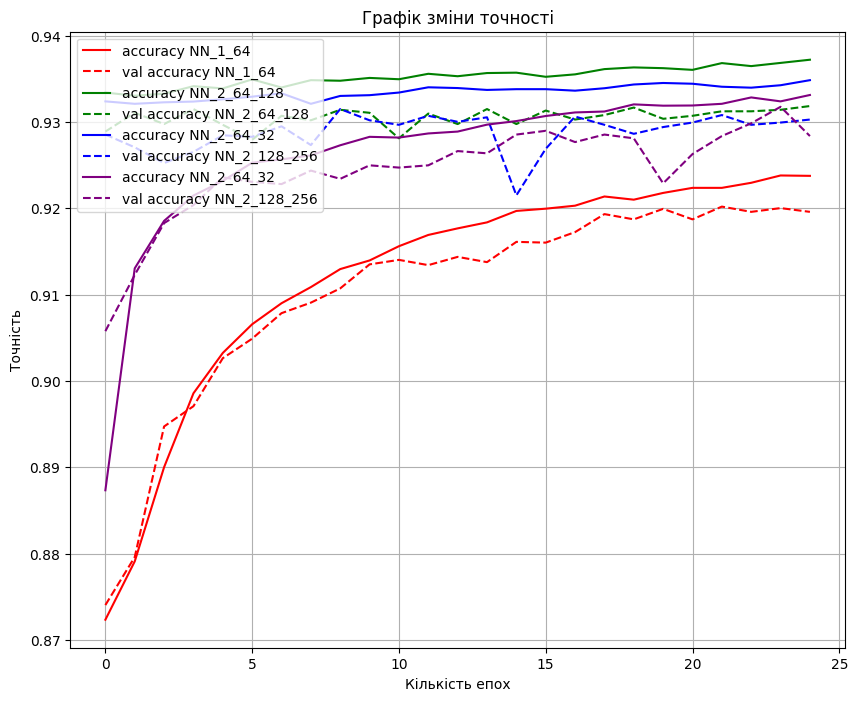

In [63]:
# побудуємо графіки точності і втрат двошарових мереж і найкращої одношарової, наочно подивимось різницю
plt.figure(figsize=(10, 8))
plt.plot(history_NN_1_64.history['accuracy'], color='red', label='accuracy NN_1_64')
plt.plot(history_NN_1_64.history['val_accuracy'], color='red', ls='--', label='val accuracy NN_1_64')
plt.plot(history_NN_2_64_128.history['accuracy'], color='green', label='accuracy NN_2_64_128')
plt.plot(history_NN_2_64_128.history['val_accuracy'], color='green', ls='--', label='val accuracy NN_2_64_128')
plt.plot(history_NN_2_64_32.history['accuracy'], color='blue', label='accuracy NN_2_64_32')
plt.plot(history_NN_2_64_32.history['val_accuracy'], color='blue', ls='--', label='val accuracy NN_2_128_256')
plt.plot(history_NN_2_128_256.history['accuracy'], color='purple', label='accuracy NN_2_64_32')
plt.plot(history_NN_2_128_256.history['val_accuracy'], color='purple', ls='--', label='val accuracy NN_2_128_256')
plt.title('Графік зміни точності')
plt.ylabel('Точність')
plt.xlabel('Кількість епох')
plt.grid()
plt.legend(loc='upper left')
plt.show()

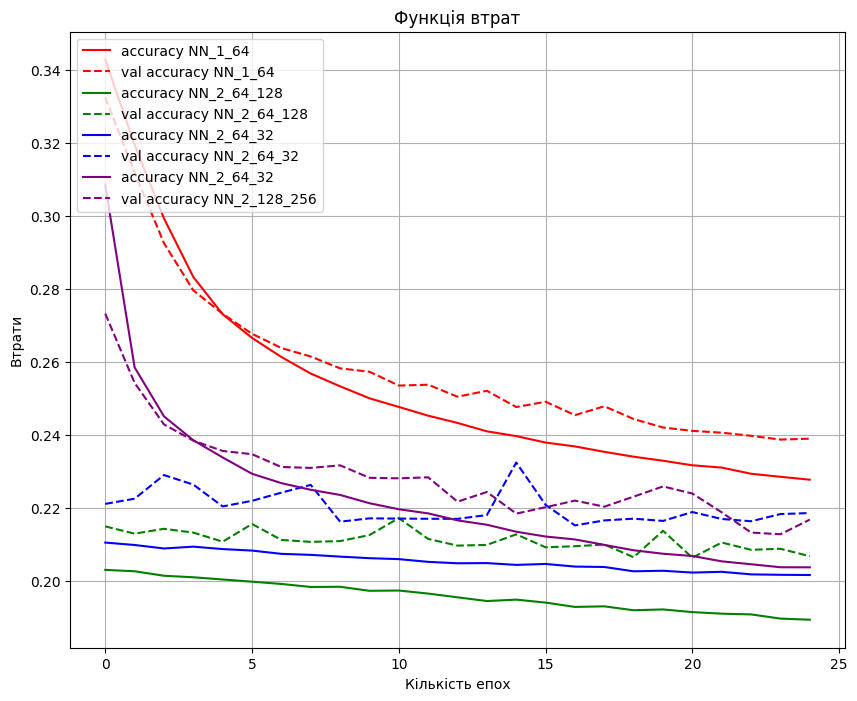

In [64]:
plt.figure(figsize=(10, 8))
plt.plot(history_NN_1_64.history['loss'], color='red', label='accuracy NN_1_64')
plt.plot(history_NN_1_64.history['val_loss'], color='red', ls='--', label='val accuracy NN_1_64')
plt.plot(history_NN_2_64_128.history['loss'], color='green', label='accuracy NN_2_64_128')
plt.plot(history_NN_2_64_128.history['val_loss'], color='green', ls='--', label='val accuracy NN_2_64_128')
plt.plot(history_NN_2_64_32.history['loss'], color='blue', label='accuracy NN_2_64_32')
plt.plot(history_NN_2_64_32.history['val_loss'], color='blue', ls='--', label='val accuracy NN_2_64_32')
plt.plot(history_NN_2_128_256.history['loss'], color='purple', label='accuracy NN_2_64_32')
plt.plot(history_NN_2_128_256.history['val_loss'], color='purple', ls='--', label='val accuracy NN_2_128_256')
plt.title('Функція втрат')
plt.ylabel('Втрати')
plt.xlabel('Кількість епох')
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [69]:
# як бачимо з графіків моделі 1_NN_64 та 2_NN_128_256 починають перетреновуваться на нашому проміжку епох, тож спробуємо застосувати early_stopping
# функція переініціалізаціі моделі. візьмемео модель з двома прихованими шарами яка показала кращі показники точності та функції втрат
# двошарові моделі 2_NN_64_32 2_NN_64_128 демонструють перенавчання одразу, тож мабуть ці архітектури ми не будемо розглядати в подальшому


def reinit_model():
    model = keras.Sequential([keras.layers.Flatten(input_shape=(9, )),
                              keras.layers.Dense(128, activation='tanh'),
                              keras.layers.Dense(256, activation='tanh'),
                              keras.layers.Dense(2, activation='sigmoid')])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [70]:
model = reinit_model()

In [71]:
from tensorflow.keras.callbacks import EarlyStopping

# Створення callback'у ранньої зупинки, поставимо значення 2 епохи після яких зупинити тренування
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# Тренування моделі з ранньою зупинкою
history_es = model.fit(
    X_train, y_train, epochs=25,
    validation_split=0.2,
    callbacks=[early_stopping]
)
# для відтворення найкращих вагів моделі, моожемо поставити restore_best_weight=True, але показник loss в нас в тій позиція ще досить великий


Epoch 1/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8725 - loss: 0.3382 - val_accuracy: 0.9045 - val_loss: 0.2747
Epoch 2/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9083 - loss: 0.2681 - val_accuracy: 0.9174 - val_loss: 0.2519
Epoch 3/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9195 - loss: 0.2454 - val_accuracy: 0.9169 - val_loss: 0.2437
Epoch 4/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9230 - loss: 0.2331 - val_accuracy: 0.9196 - val_loss: 0.2434
Epoch 5/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9242 - loss: 0.2347 - val_accuracy: 0.9252 - val_loss: 0.2350
Epoch 6/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9265 - loss: 0.2270 - val_accuracy: 0.9229 - val_loss: 0.2394
Epoch 7/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9253 - loss: 0.2289 - val_accuracy: 0.9227 - val_loss: 0.2306
Epoch 8/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9265 - loss: 0.2247 - 

In [73]:
# Early stopping спрацював на 23 єпосі
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'model - Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

model - Test Loss: 0.2359, Test Accuracy: 0.9150


In [86]:
# оцінка на тестових даних показує точність 0.915, тож провкдкмо підбір різних гіперпараметрів
# створемо функцію ініціалізації моделі з поданими параметрами для тестування, тестувать будемо функціїї активації проміжних шарів
# деякі регулярізації, оптимізатор, та розмір навчального пакету
# функцію ініціалізації лишимо ту шо і так по замовчуванню, лише для 'selu' додамо відповідну їй
from tensorflow.keras import regularizers
def create_model_with_hparams(    
    hidden_activation: str = "tanh",
    kernel_initializer: str = 'glorot_uniform',
    use_l2: bool = False,
    use_dropout: bool = False,
    optimizer: str = "adam",
):
    if hidden_activation == 'selu':
        kernel_initializer = 'lecun_normal'
    
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(9, )))
    model.add(keras.layers.Dense(128, activation=hidden_activation,
                       kernel_initializer=kernel_initializer,
                       kernel_regularizer=(regularizers.L2(1e-4) if use_l2 else None)))
    if use_dropout:
            model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(256, activation=hidden_activation,
                       #kernel_initializer=kernel_initializer,
                       kernel_regularizer=(regularizers.L2(1e-4) if use_l2 else None)))
    if use_dropout:
            model.add(keras.layers.Dropout(0.3))        
    model.add(keras.layers.Dense(2, activation='sigmoid'))

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [87]:
# Прояснимо питання  впливу функції активації
func_act = ["selu", "sigmoid", "tanh"]

activations_histories = {}
for activation in func_act:    
    print(f"Тренування з активацією: {activation}")
    model = create_model_with_hparams(hidden_activation=activation)
    
    history = model.fit(X_train, y_train, epochs=15, validation_split=0.2,)
    activations_histories[activation] = history

Тренування з активацією: selu
Epoch 1/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8785 - loss: 0.3259 - val_accuracy: 0.8960 - val_loss: 0.2815
Epoch 2/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9049 - loss: 0.2725 - val_accuracy: 0.9128 - val_loss: 0.2560
Epoch 3/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9154 - loss: 0.2493 - val_accuracy: 0.9134 - val_loss: 0.2534
Epoch 4/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9182 - loss: 0.2469 - val_accuracy: 0.9180 - val_loss: 0.2544
Epoch 5/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9227 - loss: 0.2382 - val_accuracy: 0.9225 - val_loss: 0.2495
Epoch 6/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9216 - loss: 0.2360 - val_accuracy: 0.9223 - val_loss: 0.2414
Epoch 7/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9257 - loss: 0.2278 - val_accuracy: 0.9230 - val_loss: 0.2335
Epoch 8/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accu

In [77]:
# щоб не загромоджувать як рагіше код напишем функцію по виводу пакету графиків
def plot_histories_dict(histories_dict):
    # train
    plt.figure(figsize=(12, 6))

    for name, history in histories_dict.items():
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label=f'{name} - Train Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label=f'{name} - Train Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Accuracy')
        plt.suptitle('TRAIN Losses and Accuracies')
        plt.legend()

    plt.tight_layout()
    plt.show()

    # validation
    plt.figure(figsize=(12, 6))

    for name, history in histories_dict.items():
        plt.subplot(1, 2, 1)
        plt.plot(history.history['val_loss'], label=f'{name} - Val Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['val_accuracy'], label=f'{name} - Val Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Accuracy')
        plt.suptitle('VALIDATION Losses and Accuracies')
        plt.legend()

    plt.tight_layout()
    plt.show()

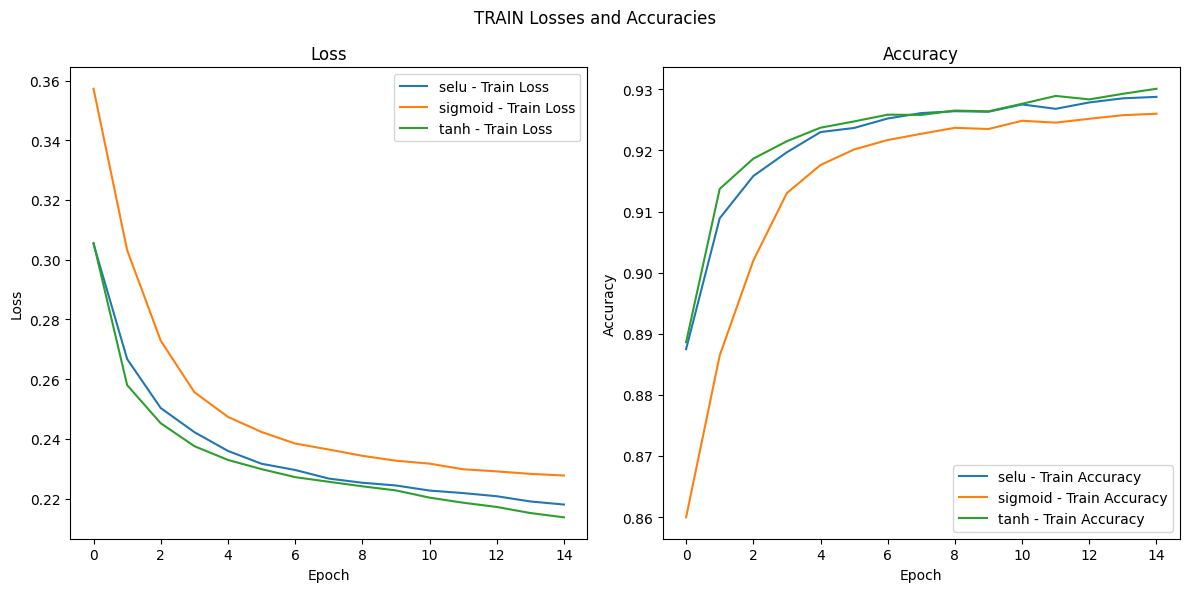

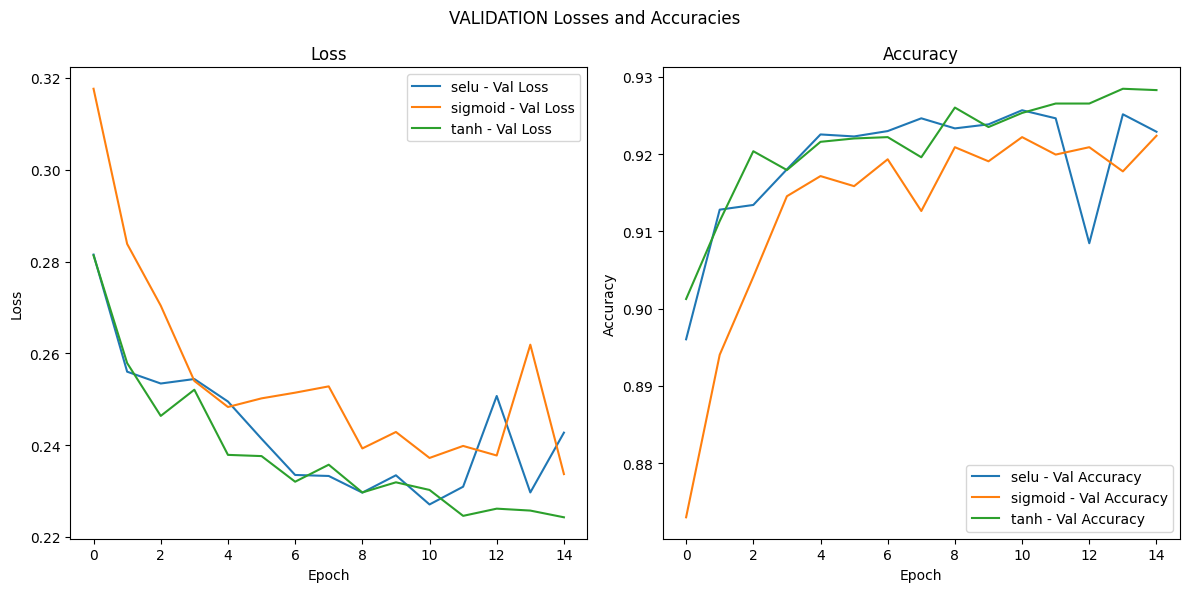

In [88]:
# подивимось на вплив функції активації
plot_histories_dict(activations_histories)

In [94]:
# Функція активації tanh має найбільшу перспективу
# тепер спробуємо покерувати регулярізацією
reg_histories = {}
reg_list = {"<no regularization>": {'use_l2': False}, 
            "<l2 regularization>": {'use_l2': True}, 
            "<l2 and dropout regularizations>":{'use_l2': True, 'use_dropout': True}}
# модель без регулярізації з попередньо знайденими параметрами
# регулярізація l2
# регулярізація l2 і dropout 30% (from future: dropout 50% давав майже те саме)
for reg, param in reg_list.items():
    print(f"Тренування з {reg}...")    
    model = create_model_with_hparams(**param)
    history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)
    reg_histories[reg] = history

Тренування з <no regularization>...
Epoch 1/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8747 - loss: 0.3340 - val_accuracy: 0.9063 - val_loss: 0.2721
Epoch 2/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9107 - loss: 0.2666 - val_accuracy: 0.9162 - val_loss: 0.2544
Epoch 3/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9186 - loss: 0.2483 - val_accuracy: 0.9189 - val_loss: 0.2515
Epoch 4/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9190 - loss: 0.2421 - val_accuracy: 0.9188 - val_loss: 0.2445
Epoch 5/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9217 - loss: 0.2336 - val_accuracy: 0.9198 - val_loss: 0.2374
Epoch 6/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9223 - loss: 0.2325 - val_accuracy: 0.9247 - val_loss: 0.2328
Epoch 7/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9253 - loss: 0.2277 - val_accuracy: 0.9227 - val_loss: 0.2318
Epoch 8/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step 

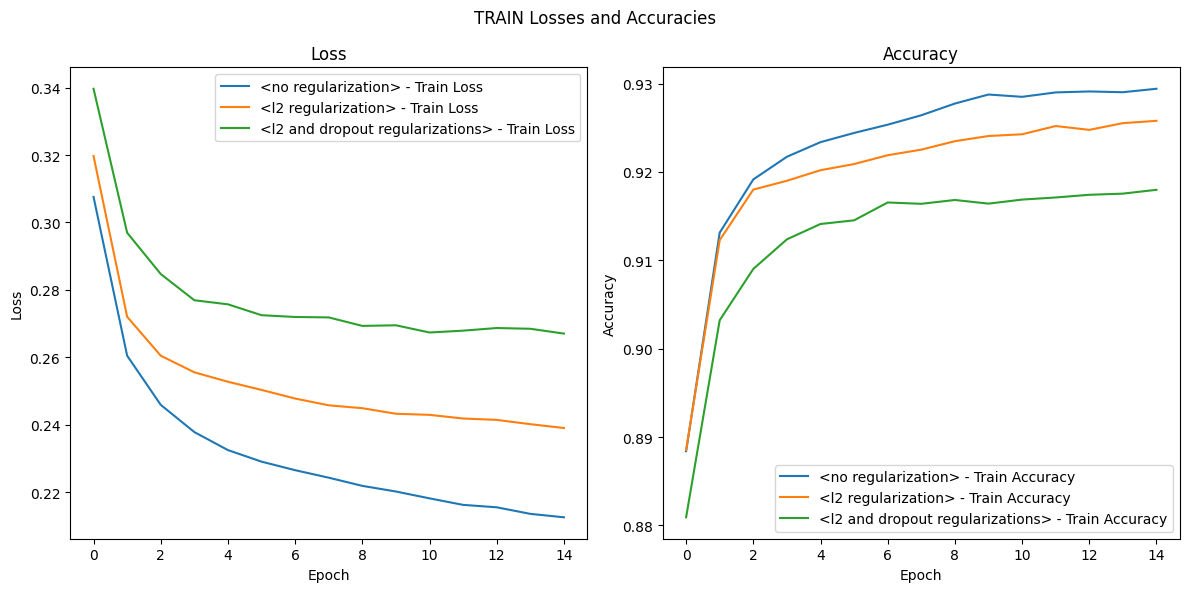

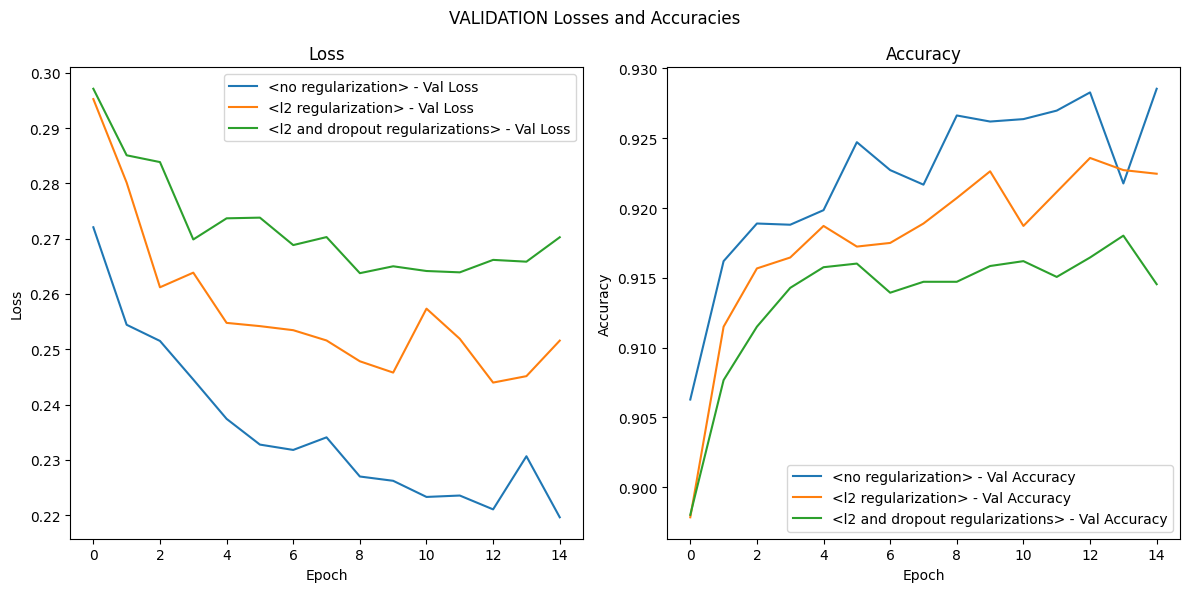

In [95]:
plot_histories_dict(reg_histories)
# Модель без регулярізації показала найкращий результат

In [96]:
# подивимось на вплив різних оптимізаторов
optimizer_histories = {}
for optimizer in ["sgd", "rmsprop", "adam"]:
    print(f"Training with {optimizer} optimizer...")
    model = create_model_with_hparams(optimizer=optimizer)
    history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)
    optimizer_histories[optimizer] = history

Training with sgd optimizer...
Epoch 1/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8378 - loss: 0.4108 - val_accuracy: 0.8715 - val_loss: 0.3358
Epoch 2/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8734 - loss: 0.3310 - val_accuracy: 0.8723 - val_loss: 0.3333
Epoch 3/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8732 - loss: 0.3320 - val_accuracy: 0.8727 - val_loss: 0.3307
Epoch 4/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8750 - loss: 0.3301 - val_accuracy: 0.8738 - val_loss: 0.3273
Epoch 5/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8771 - loss: 0.3245 - val_accuracy: 0.8751 - val_loss: 0.3230
Epoch 6/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8769 - loss: 0.3245 - val_accuracy: 0.8784 - val_loss: 0.3181
Epoch 7/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8800 - loss: 0.3162 - val_accuracy: 0.8817 - val_loss: 0.3119
Epoch 8/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc

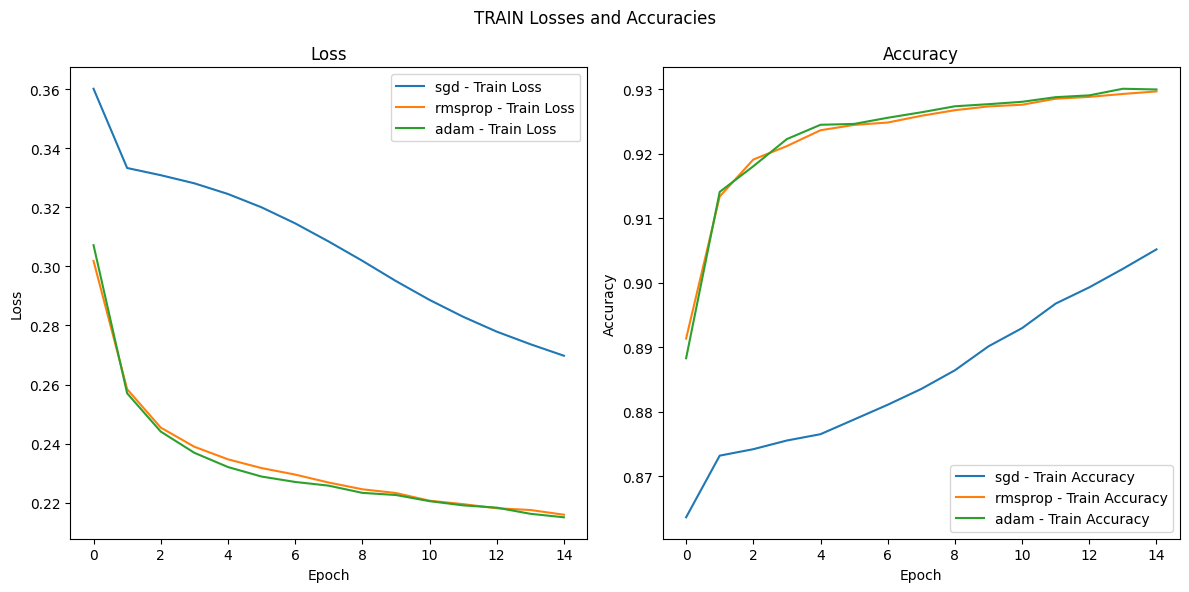

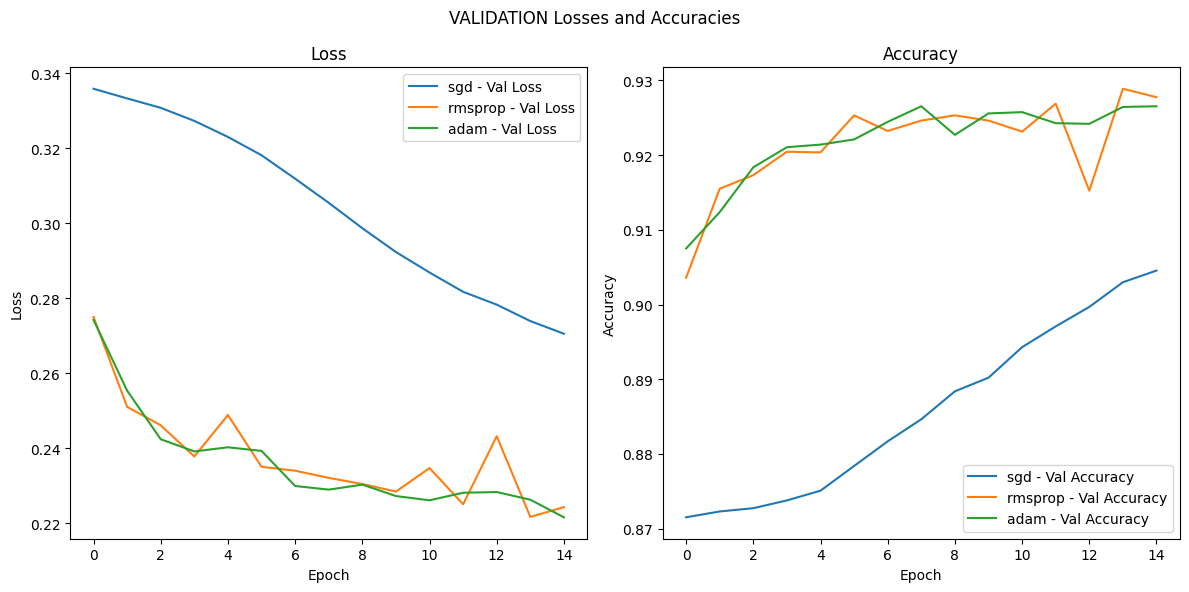

In [97]:
plot_histories_dict(optimizer_histories)
# найкращим з оптимайзерів залишився 'adam', його криві більш стабільні

In [99]:
# порівняємо як зміняться наші показники при зміні розміру батчу від 32(що і по замовчуванню) 256 також збільшимо кількість єпох до 25
bs_histories = {}
for bs in [32, 64, 256]:    
    print(f"Тренування при кількості пакетів: {bs}")
    model = create_model_with_hparams()    
    history = model.fit(X_train, y_train, epochs=15, batch_size=bs, validation_split=0.2)
    bs_histories['batсh:', str(bs)] = history

Тренування при кількості пакетів: 32
Epoch 1/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8723 - loss: 0.3360 - val_accuracy: 0.9047 - val_loss: 0.2751
Epoch 2/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9095 - loss: 0.2647 - val_accuracy: 0.9142 - val_loss: 0.2537
Epoch 3/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9183 - loss: 0.2459 - val_accuracy: 0.9163 - val_loss: 0.2480
Epoch 4/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9211 - loss: 0.2377 - val_accuracy: 0.9192 - val_loss: 0.2421
Epoch 5/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9249 - loss: 0.2319 - val_accuracy: 0.9227 - val_loss: 0.2370
Epoch 6/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9239 - loss: 0.2298 - val_accuracy: 0.9195 - val_loss: 0.2428
Epoch 7/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9269 - loss: 0.2256 - val_accuracy: 0.9230 - val_loss: 0.2307
Epoch 8/15
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

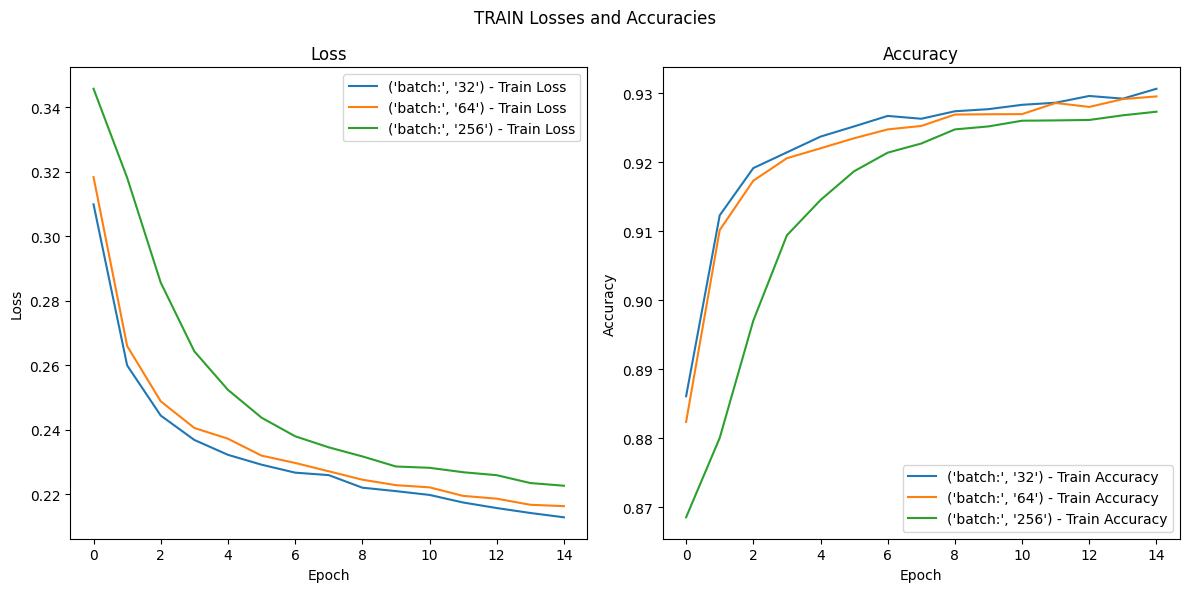

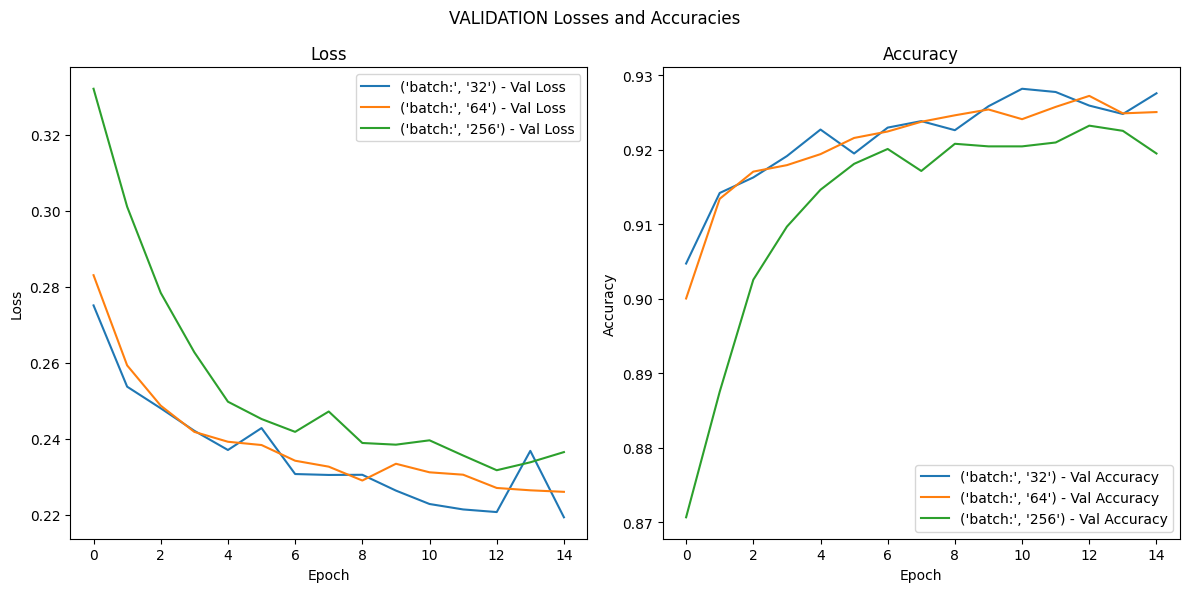

In [100]:
plot_histories_dict(bs_histories)
# розмір пакету 32 найкращий

In [116]:
# Тож в залишку оберем 2 шарову мережу з кількістью нейронів 128 і 256 відповідно, з функціями активації 'tanh' без регулярізації
# оптимізатор 'adam', розмір батча лишимо стандартний

# Для застосування нашої моделі внесемо до неї шар попередної нормалізації ознак розрахований на нашому датасеті

class Standardization(keras.layers.Layer):
    def adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis=0, keepdims=True)
        self.stds_ = np.std(data_sample, axis=0, keepdims=True)
    def call(self, inputs):
        return (inputs - self.means_) / (self.stds_ + keras.backend.epsilon())

std_layer = Standardization(input_shape=[9, ])
std_layer.adapt(np.array(X))

C:\Users\asgar\AppData\Local\Temp\ipykernel_31996\3016309364.py:12: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  std_layer = Standardization(input_shape=[9, ])


In [117]:
std_layer.means_, std_layer.stds_
# ToDo: Зробити конвеер перетворення данних натрененувати і зберігти модель.

(array([[ 0.8152254 ,  0.3340659 ,  2.45548593, 19.01684448,  0.49761242,
          0.27567357, 43.6899114 ,  4.19207572,  0.20871295]]),
 array([[ 0.3881146 ,  0.47166288,  2.02684238, 13.18844911,  0.66575045,
          0.81852776, 63.40552204,  9.81882807,  0.99964011]]))

In [120]:
# перерозібем вхідні дані, наявні вже пройшли стандартизацію, і перекондуємо y в one-hot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)

In [118]:
# Побудуємо мережу з шаром нормалізації ознак, натренуємо її використовуючи 
# Створення callback'у ранньої зупинки, поставимо значення 2 епохи після яких зупинити тренування

model_NN = keras.Sequential()
model_NN.add(std_layer)
model_NN.add(keras.layers.Flatten(input_shape=(9, )))
model_NN.add(keras.layers.Dense(128, activation='tanh'))
model_NN.add(keras.layers.Dense(256, activation='tanh'))
model_NN.add(keras.layers.Dense(2, activation='sigmoid'))
                              
model_NN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [121]:
# Тренування моделі з ранньою зупинкою
history_NN = model_NN.fit(
    X_train, y_train, epochs=25,
    validation_split=0.2,
    callbacks=[early_stopping])

Epoch 1/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8732 - loss: 0.3355 - val_accuracy: 0.9049 - val_loss: 0.2732
Epoch 2/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9106 - loss: 0.2657 - val_accuracy: 0.9135 - val_loss: 0.2587
Epoch 3/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9174 - loss: 0.2508 - val_accuracy: 0.9188 - val_loss: 0.2474
Epoch 4/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9227 - loss: 0.2359 - val_accuracy: 0.9191 - val_loss: 0.2419
Epoch 5/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9223 - loss: 0.2363 - val_accuracy: 0.9218 - val_loss: 0.2395
Epoch 6/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9263 - loss: 0.2291 - val_accuracy: 0.9231 - val_loss: 0.2322
Epoch 7/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9244 - loss: 0.2281 - val_accuracy: 0.9233 - val_loss: 0.2314
Epoch 8/25
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9294 - loss: 0.2184 - 

In [124]:
model_NN.save('C:\PythonProject\model_NN.keras')